<a href="https://colab.research.google.com/github/raphaelgoncalves/UNICAMP-DataSci4Health-Projeto-Final/blob/main/Analise_Exploratoria.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Análise Exploratória

#### Neste documento, realizaremos a primeira análise exploratória dos dados brutos extraidos do DataSus, já com os dados limpos.

## Importação das Bibliotecas

In [123]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats 
import seaborn as sns
import datetime as dt
from statsmodels.tsa.seasonal import seasonal_decompose

## DATASUS - Importação, Pré-Processamento e Visualização dos dados.

### Internações por Influenza no SUS entre 2015 e 2020 na faixa etária de 0 a 4 anos

In [124]:
internacao = 'https://raw.githubusercontent.com/raphaelgoncalves/UNICAMP-DataSci4Health-Projeto-Final/main/Data/interim/teste_6_datas.csv'

df = pd.read_csv(internacao)
df


,data,faixa0a4
0,2015-01,351
1,2015-02,332
2,2015-03,751
3,2015-04,800
4,2015-05,746
...,...,...
67,2020-08,194
68,2020-09,143
69,2020-10,132
70,2020-11,171


### Entendendo os tipos de dados das features do dataset

In [125]:
df.dtypes

data        object
faixa0a4     int64
dtype: object

###Conversões de data

In [126]:
df.data = pd.to_datetime(df.data)

df

,data,faixa0a4
0,2015-01-01,351
1,2015-02-01,332
2,2015-03-01,751
3,2015-04-01,800
4,2015-05-01,746
...,...,...
67,2020-08-01,194
68,2020-09-01,143
69,2020-10-01,132
70,2020-11-01,171


### Gráfico da Série Temporal

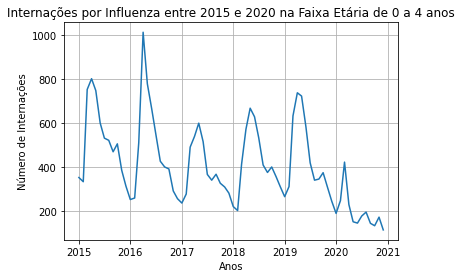

In [127]:
plt.plot_date(df.data,df.faixa0a4, fmt='-')
plt.xlabel("Anos")
plt.ylabel("Número de Internações")
plt.title("Internações por Influenza entre 2015 e 2020 na Faixa Etária de 0 a 4 anos")
plt.grid()
plt.show()

### Separação dos anos em DataFrames para análises estatísticas individuais.

In [128]:
df2015 = df.loc[0:11, :]
df2016 = df.loc[12:23,:]
df2017 = df.loc[24:35,:]
df2018 = df.loc[36:47,:]
df2019 = df.loc[48:59,:]
df2020 = df.loc[60:71,:]


### Gráficos por Ano

#### Dados de Janeiro a Dezembro de 2015 a 2020

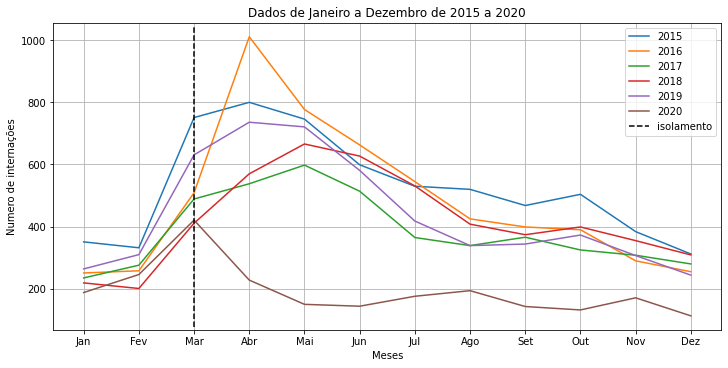

In [129]:
fig, axs = plt.subplots(1, figsize=(10, 5), constrained_layout=True)

index = ['Jan','Fev','Mar','Abr','Mai', 'Jun', 'Jul', 'Ago',  'Set', 'Out', 'Nov', 'Dez']

axs.plot(index, df2015.faixa0a4, label='2015',  ls='-')
axs.plot(index, df2016.faixa0a4, label='2016',  ls='-')
axs.plot(index, df2017.faixa0a4, label='2017',  ls='-')
axs.plot(index, df2018.faixa0a4, label='2018',  ls='-')
axs.plot(index, df2019.faixa0a4, label='2019',  ls='-')
axs.plot(index, df2020.faixa0a4, label='2020',  ls='-')
plt.axvline(x='Mar', ymin=0.01, ymax=0.99,  color='black', label='isolamento', ls='--')
axs.set_title('Dados de Janeiro a Dezembro de 2015 a 2020')
axs.set_ylabel('Numero de internações')
axs.set_xlabel('Meses')
axs.legend()

axs.grid()

plt.show()



## Análise Estatística



### Decomposição da Série temporal para estudo de tendência, sazonalidade e residual

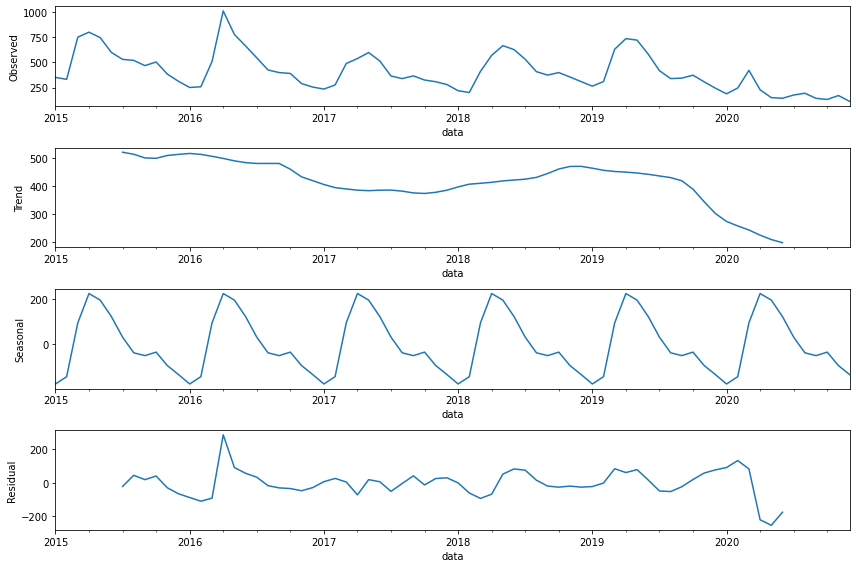

In [130]:
df.index = df.data

result = seasonal_decompose(df.faixa0a4, model='additive')

fig, (ax1,ax2,ax3, ax4) = plt.subplots(4,1, figsize=(12,8))
result.observed.plot(ax=ax1, ylabel="Observed" )
result.trend.plot(ax=ax2, ylabel="Trend")
result.seasonal.plot(ax=ax3, ylabel="Seasonal")
result.resid.plot(ax=ax4, ylabel="Residual")
plt.tight_layout()





### Gráficos de Autocorrelação

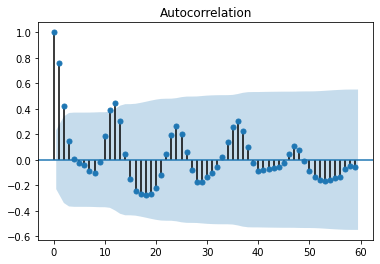

In [131]:
from statsmodels.graphics import tsaplots


fig = tsaplots.plot_acf(df.faixa0a4, lags=59)

plt.show()

(0.0, 72.0)

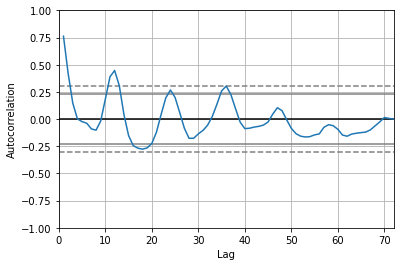

In [132]:
from pandas.plotting import autocorrelation_plot


ax = autocorrelation_plot(df.faixa0a4)

ax.set_xlim([0, 72])



## Indice de Isolamento Social no Brasil 2020-2021

### Importação dos dados 

In [133]:
isolamento = 'https://raw.githubusercontent.com/raphaelgoncalves/UNICAMP-DataSci4Health-Projeto-Final/main/Data/interim/teste%201%20-%20Isolamento%20Social%20(Ipea).csv'
df1 = pd.read_csv(isolamento)

df1


,data,AC,AL,AM,AP,BA,CE,DF,ES,GO,MA,MG,MS,MT,PA,PB,PE,PI,PR,RJ,RN,RO,RR,RS,SC,SE,SP,TO,Brasil
0,01/03/2020,46.4,41.1,43.2,44.0,39.8,43.0,40.9,43.4,39.4,41.2,41.6,40.9,41.3,41.1,39.5,42.2,38.9,41.7,48.2,41.0,43.5,41.0,42.4,42.4,38.4,41.6,38.3,42.0
1,02/03/2020,29.1,25.7,31.4,27.9,25.8,28.8,27.4,28.3,27.0,27.5,28.3,27.7,28.8,27.9,26.2,26.5,25.5,27.7,31.7,25.5,28.4,27.5,27.3,28.3,25.9,27.2,24.5,27.7
2,03/03/2020,31.8,27.6,32.3,30.7,27.8,30.6,28.1,28.4,28.1,30.8,28.8,29.0,30.1,30.2,28.1,28.0,28.0,29.1,30.5,27.6,33.6,28.8,28.5,29.9,27.9,28.8,26.5,29.0
3,04/03/2020,34.6,29.2,34.9,32.1,28.7,32.6,29.3,30.4,29.3,30.6,30.3,30.8,31.5,32.1,29.2,29.6,28.6,30.3,32.0,28.5,32.9,30.8,30.1,30.8,29.2,29.4,27.5,30.2
4,05/03/2020,34.7,28.7,35.2,31.4,28.3,31.7,29.6,30.5,29.5,30.6,29.9,30.4,31.3,31.7,28.9,28.7,28.0,30.4,31.2,28.1,32.3,30.7,29.6,30.7,28.8,28.7,26.9,29.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
382,18/03/2021,38.7,34.8,40.5,42.0,36.4,41.8,36.3,34.6,33.4,37.0,33.9,29.6,32.7,43.1,38.3,41.0,44.9,33.5,32.1,35.9,37.1,35.9,33.7,30.7,35.2,36.3,31.7,35.9
383,19/03/2021,40.1,34.8,38.5,46.1,37.3,49.2,36.6,34.4,35.4,38.9,34.2,31.4,32.5,43.4,37.1,40.0,41.3,35.3,33.3,35.6,37.4,36.6,33.2,31.1,35.7,35.9,37.9,36.2
384,20/03/2021,55.5,43.4,40.3,58.2,41.9,45.4,39.1,39.4,38.3,39.3,39.2,36.0,36.9,44.6,42.6,44.4,43.4,40.6,36.9,43.1,44.3,39.3,41.0,37.7,40.8,40.3,37.2,40.6
385,21/03/2021,64.2,53.1,46.3,56.5,53.1,51.1,47.8,53.2,46.0,47.3,50.7,40.8,45.3,52.5,46.7,55.2,47.7,50.8,46.0,55.7,56.6,43.5,59.9,49.2,49.4,51.4,40.6,52.6


### Conversões de data - Pré-processamento

In [134]:
df1.data = pd.to_datetime(df1.data, format = '%d/%m/%Y')

df1

,data,AC,AL,AM,AP,BA,CE,DF,ES,GO,MA,MG,MS,MT,PA,PB,PE,PI,PR,RJ,RN,RO,RR,RS,SC,SE,SP,TO,Brasil
0,2020-03-01,46.4,41.1,43.2,44.0,39.8,43.0,40.9,43.4,39.4,41.2,41.6,40.9,41.3,41.1,39.5,42.2,38.9,41.7,48.2,41.0,43.5,41.0,42.4,42.4,38.4,41.6,38.3,42.0
1,2020-03-02,29.1,25.7,31.4,27.9,25.8,28.8,27.4,28.3,27.0,27.5,28.3,27.7,28.8,27.9,26.2,26.5,25.5,27.7,31.7,25.5,28.4,27.5,27.3,28.3,25.9,27.2,24.5,27.7
2,2020-03-03,31.8,27.6,32.3,30.7,27.8,30.6,28.1,28.4,28.1,30.8,28.8,29.0,30.1,30.2,28.1,28.0,28.0,29.1,30.5,27.6,33.6,28.8,28.5,29.9,27.9,28.8,26.5,29.0
3,2020-03-04,34.6,29.2,34.9,32.1,28.7,32.6,29.3,30.4,29.3,30.6,30.3,30.8,31.5,32.1,29.2,29.6,28.6,30.3,32.0,28.5,32.9,30.8,30.1,30.8,29.2,29.4,27.5,30.2
4,2020-03-05,34.7,28.7,35.2,31.4,28.3,31.7,29.6,30.5,29.5,30.6,29.9,30.4,31.3,31.7,28.9,28.7,28.0,30.4,31.2,28.1,32.3,30.7,29.6,30.7,28.8,28.7,26.9,29.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
382,2021-03-18,38.7,34.8,40.5,42.0,36.4,41.8,36.3,34.6,33.4,37.0,33.9,29.6,32.7,43.1,38.3,41.0,44.9,33.5,32.1,35.9,37.1,35.9,33.7,30.7,35.2,36.3,31.7,35.9
383,2021-03-19,40.1,34.8,38.5,46.1,37.3,49.2,36.6,34.4,35.4,38.9,34.2,31.4,32.5,43.4,37.1,40.0,41.3,35.3,33.3,35.6,37.4,36.6,33.2,31.1,35.7,35.9,37.9,36.2
384,2021-03-20,55.5,43.4,40.3,58.2,41.9,45.4,39.1,39.4,38.3,39.3,39.2,36.0,36.9,44.6,42.6,44.4,43.4,40.6,36.9,43.1,44.3,39.3,41.0,37.7,40.8,40.3,37.2,40.6
385,2021-03-21,64.2,53.1,46.3,56.5,53.1,51.1,47.8,53.2,46.0,47.3,50.7,40.8,45.3,52.5,46.7,55.2,47.7,50.8,46.0,55.7,56.6,43.5,59.9,49.2,49.4,51.4,40.6,52.6


### Visualização de dados

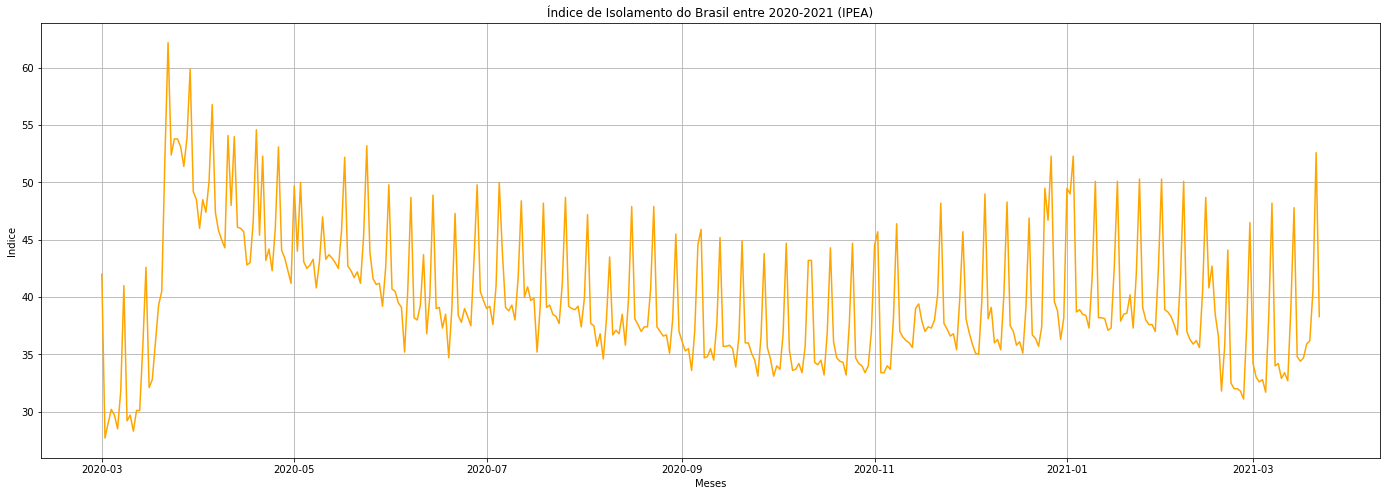

In [135]:
fig, axs = plt.subplots(figsize=(24,8))
    
axs.plot(df1.data,df1.Brasil, ls='-',color='orange' )
axs.set_xlabel("Meses")
axs.set_ylabel("Indice")
axs.set_title("Índice de Isolamento do Brasil entre 2020-2021 (IPEA)")
plt.grid()
plt.show()

### Decomposição da Série temporal para estudo de tendência, sazonalidade e residual

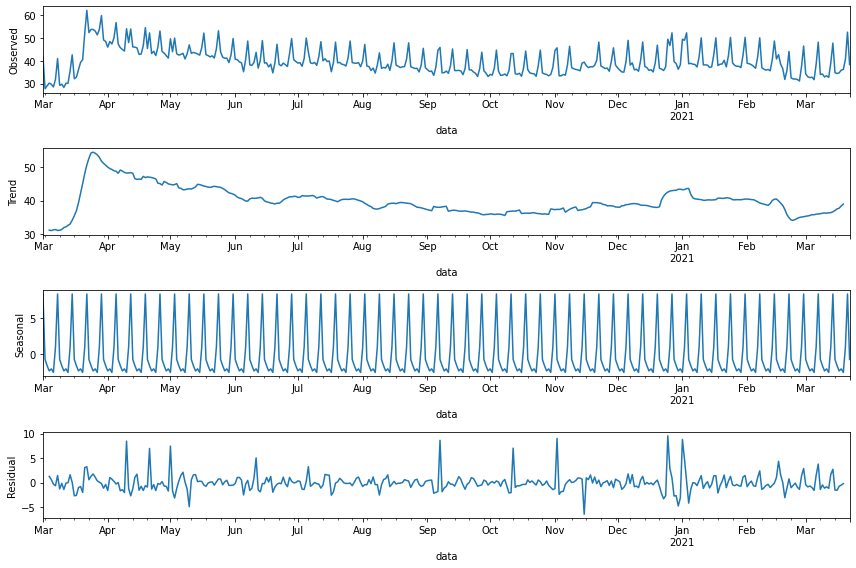

In [136]:
df1.index = df1.data

result = seasonal_decompose(df1.Brasil, model='additive')

fig, (ax1,ax2,ax3, ax4) = plt.subplots(4,1, figsize=(12,8))
result.observed.plot(ax=ax1, ylabel="Observed" )
result.trend.plot(ax=ax2, ylabel="Trend")
result.seasonal.plot(ax=ax3, ylabel="Seasonal")
result.resid.plot(ax=ax4, ylabel="Residual")
plt.tight_layout()

## Correlação entre as Séries Temporais

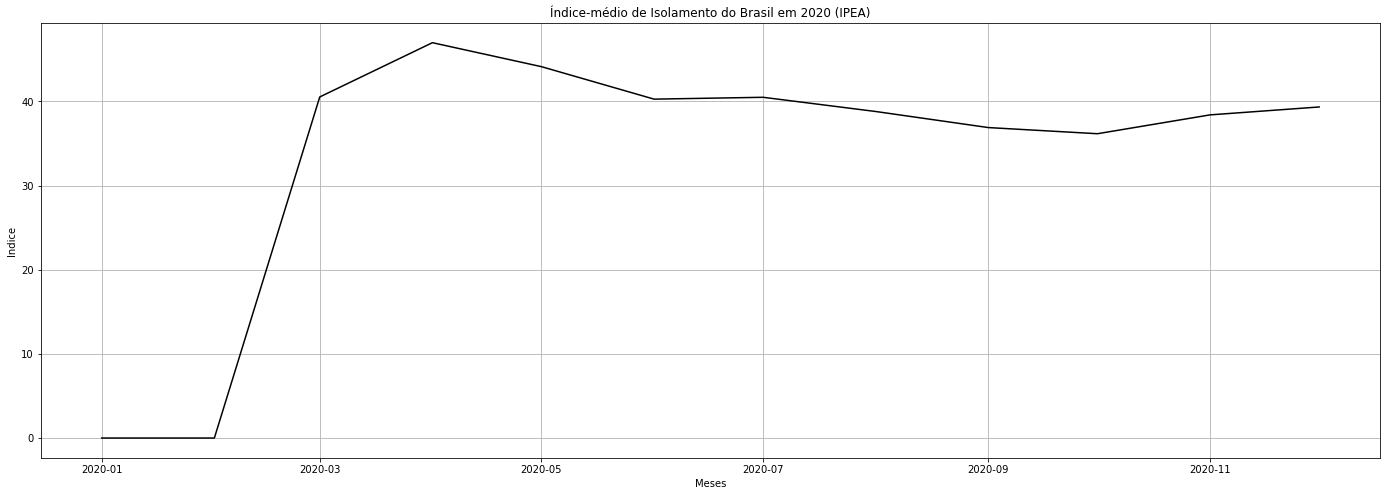

In [145]:
#upload do .csv de médias mensais do indice de isolamento
isolamento_mes = 'https://raw.githubusercontent.com/raphaelgoncalves/UNICAMP-DataSci4Health-Projeto-Final/main/Data/interim/teste2_isolamento_agv_mes.csv'
df1 = pd.read_csv(isolamento_mes)
#conversões de data
df1.data = pd.to_datetime(df1.data, format='%d/%m/%Y')
df1.isolamento_avg = df1.isolamento_avg.fillna(0)

fig, axs = plt.subplots(figsize=(24,8))
    
axs.plot(df1.data,df1.isolamento_avg, ls='-',color='black' )
axs.set_xlabel("Meses")
axs.set_ylabel("Indice")
axs.set_title("Índice-médio de Isolamento do Brasil em 2020 (IPEA)")
plt.grid()
plt.show()



In [152]:
##porcentagem de mudança entre os valores dos arrays
df2020['pct_chg'] = df2020.faixa0a4.pct_change()
df1['pct_chg'] = df1.isolamento_avg.pct_change()

#Limpeza de NaN e inf
df1.pct_chg = df1.pct_chg.fillna(0)
df2020.pct_chg = df2020.pct_chg.fillna(0)
df1.pct_chg[2] = 0

df1



/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:5170: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#retu

,data,isolamento_avg,pct_chg
0,2020-01-01,0.00,0.000000
1,2020-02-01,0.00,0.000000
2,2020-03-01,40.54,0.000000
3,2020-04-01,46.99,0.159102
4,2020-05-01,44.14,-0.060651
5,2020-06-01,40.28,-0.087449
6,2020-07-01,40.50,0.005462
7,2020-08-01,38.81,-0.041728
8,2020-09-01,36.90,-0.049214
9,2020-10-01,36.17,-0.019783


In [154]:
corr = stats.pearsonr(df2020.pct_chg, df1.pct_chg)
print("Correlação de entre as séries temporais:", corr)

Correlação de entre as séries temporais: (-0.11317775161897563, 0.7261790052455194)


## Conclusões


#### <p align="justify">  Inicialmente, cabe ressaltar que os dados estão organizados em séries temporais - ST. Nesta perspectiva, um série de análises muito particulares (Tendência, Sazonalidade e Residuais) devem ser realizadas através da decomposição da ST. Os dados tem uma tendência de queda leve, que é acentuada em 2020. Há sazonalidade anual marcante em alguns pontos da ST, assim como há residuais apontados em Abril de 2016 e de 2020. </p>

#### <p align="justify">  A partir da análise inicial dos dados, há possibilidade de utilização de modelos baseados em autoregressão e médias móveis para prever, com base em dados de 2015 a 2019 como deveria se comportar os dados de 2020 sem a interferência do isolamento social como variável. A partir disto poderá ser realizada uma comparação entre os dados de 2020 previsto e real. </p> 

#### <p align="justify">  O gráfico que plota individualmente os anos, mostra claramente que há a interferência de algum fator que vem a interromper a série temporal dos últimos 5 anos. </p>

#### <p align="justify">  Os dados da série temporal relacionada ao índice de isolamento no Brasil, entre 2020-2021 podem ser utilizados para dar suporte às conclusões extraídas após a geração de modelos preditivos, através da triangulação das informações obtidas neste estudo de caso. Em uma análise de decomposição da série temporal, notou-se uma linha de tendencia em queda na sua maioria, com sazonalidade semanal bem definida. Ainda, pode ser realizada uma cross-correlation para verificar a correlação entre as séries temporais, buscando novas informações sobre a solução da pergunta de pesquisa.</p>

In [137]:
from IPython.display import Image
Image(url='https://miro.medium.com/max/576/1*DBd-ZU-1LwkcJ_0-y8qvCA.gif')

#XDD
#plt.thanksplot!! rsrs
